# Exercise 5 - Advanced Statistics for Physics Analysis (A.Y. 2022-2023)
by Erica Brisigotti (2097202)

In [1]:
library('coda')
library('rjags')
library('tidyverse')

Linked to JAGS 4.3.0

Loaded modules: basemod,bugs

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
my_median <- function(post_d, mu, delta_mu){
    cum_d <- cumsum(post_d)*delta_mu
    d_median <- mu[which(cum_d >= 0.5)][1]
    return (d_median)}

In [3]:
my_credibility_interval <- function(post_d, mu, delta_mu){
    cum_d <- cumsum(post_d)*delta_mu
    low_lim <- mu[which(cum_d >= 0.025)][1]
    up_lim <- mu[which(cum_d >= 0.975)][1]
    return (c(low_lim,up_lim))}

In [4]:
my_norm <- function(z, delta){ z/( delta*sum(z) ) }

In [5]:
my_mode <- function(y, dist){ y[which(dist ==max(dist))] }

In [6]:
my_mean <- function(y, dist){ sum(y*dist)/sum(dist) }

In [7]:
my_std <- function(y, dist){
    m = my_mean(y,dist)
    return (sum(y0-m)**2/sum(dist))**0.5 }

## Exercise 1
Ladislaus Josephovich Bortkiewicz was a Russian economist and statistician. He noted that the Poisson distribution can be very useful in applied statistics when describing low-frequency events in a large population. In a famous example he showed that the number of deaths by horse kick among the Prussian army follows the Poisson distribution.

Considering the following to sets of observations taken over a fixed large time interval in two different corps:

$$
\begin{matrix}
      \text{y death soldiers} & 0 & 1 & 2 & 3 & 4 & \geq 5 \\
      \hline
      n_1 \text{observations} & 109 & 65 & 22 & 3 & 1 & 0 \\
      n_2 \text{observations} & 144 & 91 & 32 & 11 & 2 & 0\\
\end{matrix}
$$

In [8]:
delta_y <- 0.001
y <- seq(0,5,delta_y)
y0 <- seq(0,5,1)
n_1 <- c(109,65,22,3,1,0)
n_2 <- c(144,91,32,11,2,0)

In [9]:
# I decide to summarize each set of observations with their mean
m_1 <- my_mean(y0,n_1)
m_2 <- my_mean(y0,n_2)

<span style="color:blue"> Since the process is the Posson, I can exploit the property that returns, from a Gamma$(\alpha,\lambda)$ prior, a Gamma$(\alpha^\prime = \alpha + \sum y , \lambda^\prime = \lambda + n )$ posterior. </span>

- assuming a uniform prior, compute and plot the posterior distribution for λ, the death rate over the measurement time. Determine the posterior mean, median and variance, and compute the 95% credibility interval

In [10]:
# a uniform prior is a Gamma(1,0)
alpha_prior <- 1
lambda_prior <- 0
# from the parameters of the Gamma prior, I get the parameters of the Gamma posterior based on the known formulas
alpha_post_1 <- alpha_prior + m_1
lambda_post_1 <- lambda_prior + 1
alpha_post_2 <- alpha_prior + m_2
lambda_post_2 <- lambda_prior + 1
post_dist_1 <- my_norm(dgamma(y, alpha_post_1, lambda_post_1), delta_y)
post_dist_2 <- my_norm(dgamma(y, alpha_post_2, lambda_post_2), delta_y)

In [11]:
# I extract the estimators
# for the mean and the standard deviation, I use the known formulas
mean_1 <- alpha_post_1/lambda_post_1
mean_2 <- alpha_post_2/lambda_post_2
var_1 <- alpha_post_1/lambda_post_1**2
var_2 <- alpha_post_2/lambda_post_2**2
# for the remaining ones, I do it manually
med_1 <- my_median(post_dist_1, y, delta_y)
med_2 <- my_median(post_dist_2, y, delta_y)
lim_1 <- my_credibility_interval(post_dist_1, y, delta_y)
lim_2 <- my_credibility_interval(post_dist_2, y, delta_y)
mode_1 <- my_mode(y, post_dist_1)
mode_2 <- my_mode(y, post_dist_2)

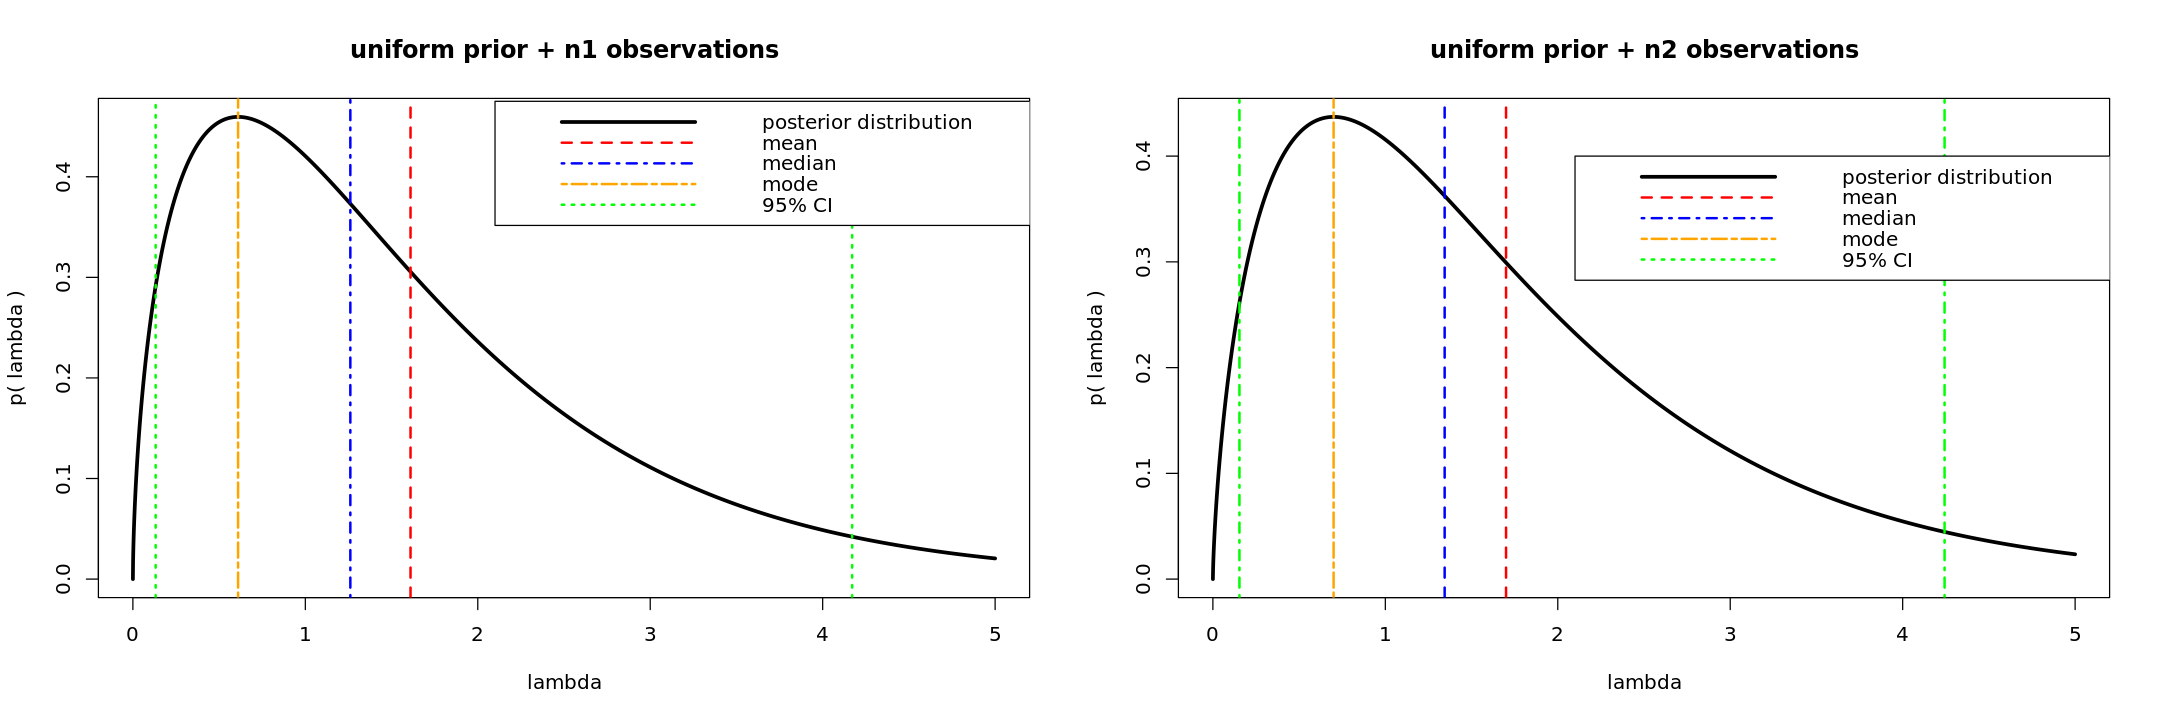

In [12]:
options(repr.plot.width=18, repr.plot.height=6)
par( mfrow=c(1,2) )

plot(y, post_dist_1, col='black', type='l', lwd=3, lty=1, main="uniform prior + n1 observations", xlab='lambda',
     ylab='p( lambda )')
abline(v=mean_1, col='red', lwd=2, lty=2)
abline(v=med_1, col='blue', lwd=2, lty=4)
abline(v=mode_1, col='orange', lwd=2, lty=6)
abline(v=lim_1, col='green', lwd=2, lty=3)
legend(2.1, 0.475, legend=c("posterior distribution","mean",'median','mode','95% CI'),
       col=c('black','red','blue','orange','green'), lty = c(1, 2, 4, 6, 3), lwd=c(3, 2, 2, 2, 2))

plot(y, post_dist_2, col='black', type='l', lwd=3, lty=1, main="uniform prior + n2 observations", xlab='lambda',
     ylab='p( lambda )')
abline(v=mean_2, col='red', lwd=2, lty=2)
abline(v=med_2, col='blue', lwd=2, lty=2)
abline(v=mode_2, col='orange', lwd=2, lty=6)
abline(v=lim_2, col='green', lwd=2, lty=4)
legend(2.1, 0.4, legend=c("posterior distribution","mean",'median','mode','95% CI'),
       col=c('black','red','blue','orange','green'), lty = c(1, 2, 4, 6, 3), lwd=c(3, 2, 2, 2, 2))

- assuming now a Jeffreys’ prior, $$ g(\lambda) ∝ 1/\sqrt{\lambda} \;\; \text{with} \;\; λ > 0 $$ compute and plot the posterior distribution for λ, the death rate over the measurement time. Determine the posterior mean, median and variance, and compute the 95% credibility interval.


In [13]:
# a Jeffreys' prior is a Gamma(0.5,0)
alpha_prior <- 0.5
lambda_prior <- 0
# from the parameters of the Gamma prior, I get the parameters of the Gamma posterior based on the known formulas
alpha_post_1 <- alpha_prior + m_1
lambda_post_1 <- lambda_prior + 1
alpha_post_2 <- alpha_prior + m_2
lambda_post_2 <- lambda_prior + 1
post_dist_1 <- my_norm(dgamma(y, alpha_post_1, lambda_post_1), delta_y)
post_dist_2 <- my_norm(dgamma(y, alpha_post_2, lambda_post_2), delta_y)

In [14]:
# I extract the estimators
# for the mean and the standard deviation, I use the known formulas
mean_1 <- alpha_post_1/lambda_post_1
mean_2 <- alpha_post_2/lambda_post_2
var_1 <- alpha_post_1/lambda_post_1**2
var_2 <- alpha_post_2/lambda_post_2**2
# for the remaining ones, I do it manually
med_1 <- my_median(post_dist_1,y,delta_y)
med_2 <- my_median(post_dist_2,y,delta_y)
lim_1 <- my_credibility_interval(post_dist_1, y, delta_y)
lim_2 <- my_credibility_interval(post_dist_2, y, delta_y)
mode_1 <- my_mode(y, post_dist_1)
mode_2 <- my_mode(y, post_dist_2)

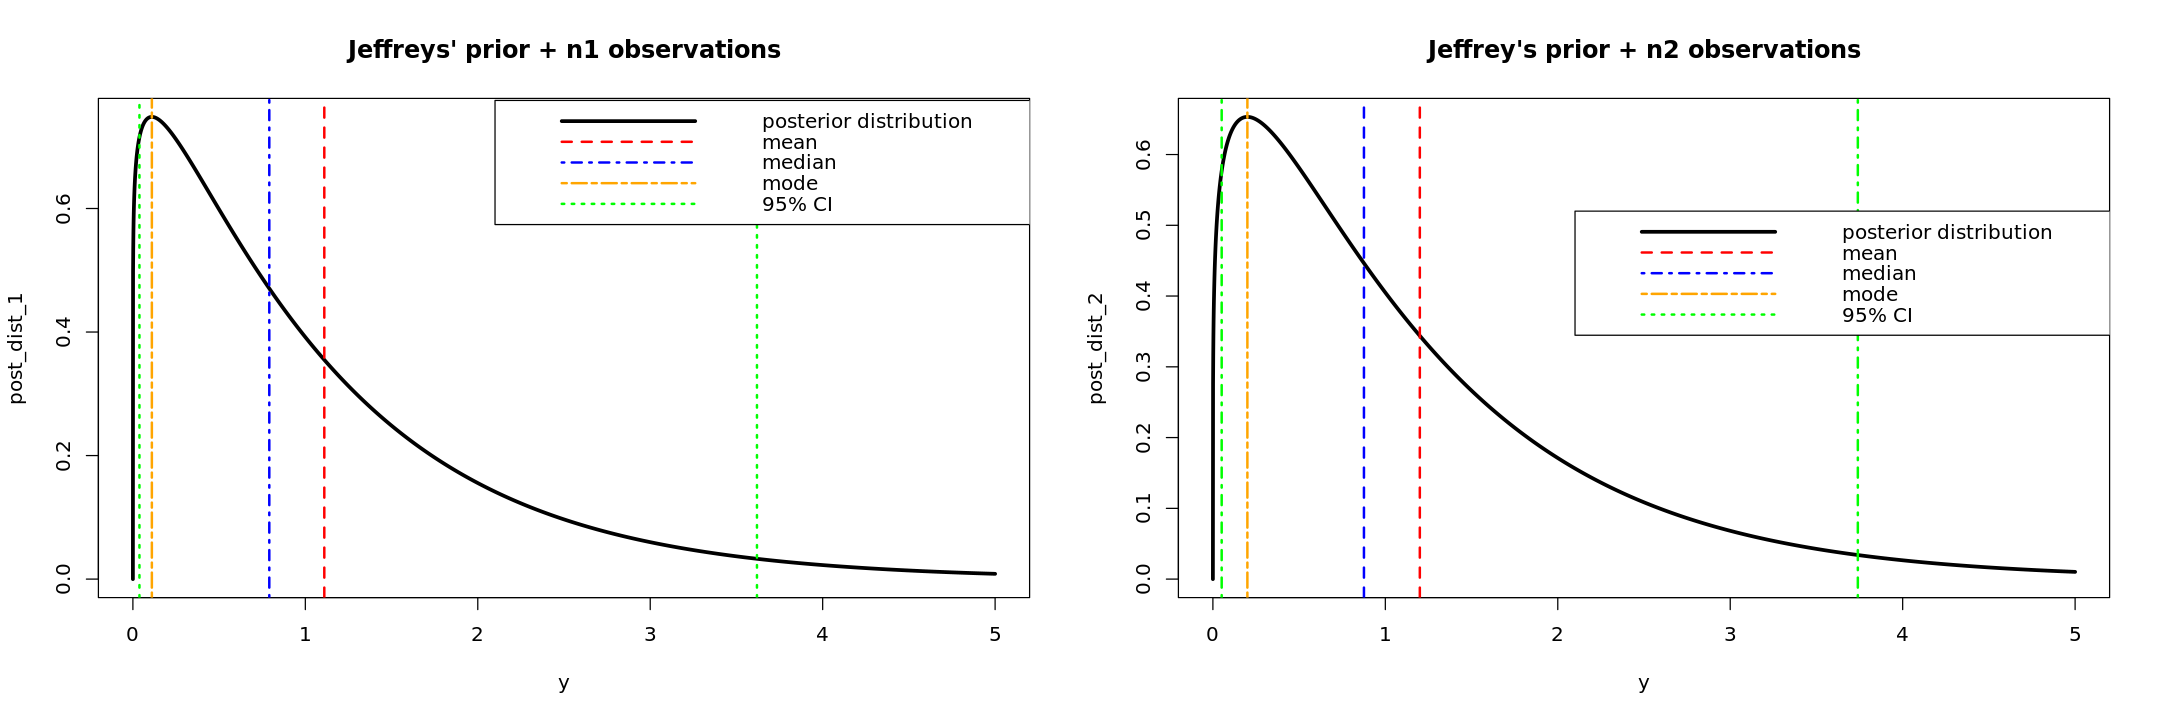

In [15]:
options( repr.plot.width=18, repr.plot.height=6)
par( mfrow=c(1,2) )

plot(y, post_dist_1, col='black', type='l', lwd=3, lty=1, main="Jeffreys' prior + n1 observations", xlim=c(0,5))
abline( v=mean_1, col='red', lwd=2, lty=2)
abline( v=med_1, col='blue', lwd=2, lty=4)
abline( v=mode_1, col='orange', lwd=2, lty=6)
abline( v=lim_1, col='green', lwd=2, lty=3)
legend(2.1, 0.775, legend=c("posterior distribution","mean",'median','mode','95% CI'),
       col=c('black','red','blue','orange','green'), lty = c(1, 2, 4, 6, 3), lwd=c(3, 2, 2, 2, 2))

plot(y, post_dist_2, col='black', type='l', lwd=3, lty=1, main="Jeffrey's prior + n2 observations", xlim=c(0,5))
abline( v=mean_2, col='red', lwd=2, lty=2)
abline( v=med_2, col='blue', lwd=2, lty=2)
abline( v=mode_2, col='orange', lwd=2, lty=6)
abline( v=lim_2, col='green', lwd=2, lty=4)
legend(2.1, 0.52, legend=c("posterior distribution","mean",'median','mode','95% CI'),
       col=c('black','red','blue','orange','green'), lty = c(1, 2, 4, 6, 3), lwd=c(3, 2, 2, 2, 2))

## Exercise 2
Solve Exercise 1 with a Markov Chain Monte Carlo. Build your own MCMC, using the functions introduced during lectures, or using a MCM library like JAGS.

In [16]:
# I design a function that is able to manage both cases (i.e. priors)
my_MCMC <- function(prior_name){  
    # this function executes the MCMC ussing rjags and choosing the prior given as an input
    # the MCMC is run for both datasets given in exercise 1, which are characterized by their averages
    # I retrieve the (poisson based) model defined in the external file
    if (prior_name == "uniform prior"){
        model <- "Brisigotti_Erica_rlab05_unif_prior_MCMC.bug"
        h_1 <- 0.47
        h_2 <- 0.44 }
    else if (prior_name == "Jeffreys' prior"){
        model <- "Brisigotti_Erica_rlab05_Jeff_prior_MCMC.bug"
        h_1 <- 2.75
        h_2 <- 2.2 }

    # I run the MCMC chain for the first dataset
    data_1 <- NULL
    # I give the mean of the first dataset as the input  
    data_1$X <- m_1 
    # I retrieve the (poisson based) model defined in the external file
    jm_1 <- jags.model(model, data_1, quiet=TRUE)
    # I update the Markov chain by setting the number of iterations
    update(jm_1, 10000)
    # I then sample from the MCMC algorithm
    chain_1 <- coda.samples(jm_1, c("lambda", "Y"), n.iter=100000)
    # and save my chain in a dataframe format
    df_1 <- as.data.frame( as.mcmc(chain_1) )

    # I run the MCMC chain for the second dataset
    data_2 <- NULL
    # I give the mean of the second dataset as the input  
    data_2$X <- m_2 
    jm_2 <- jags.model(model, data_2, quiet=TRUE)
    # I update the Markov chain by setting the number of iterations
    update(jm_2, 10000)
    # I then sample from the MCMC algorithm
    chain_2 <- coda.samples(jm_2 , c("lambda", "Y"), n.iter=100000)
    # and save my chain in a dataframe format
    df_2 <- as.data.frame( as.mcmc(chain_2) )

    # I get the pieces of information given by the histograms, which are needed to extract estimators
    temp_1 <- hist(df_1$lambda, plot=FALSE, nc=100)
    temp_2 <- hist(df_2$lambda, plot=FALSE, nc=100)

    # I update the terminology to match the wording used in the previous sections of the code
    post_dist_1 <- temp_1$density
    y_1 <- temp_1$mids
    delta_y_1 <- y_1[2]-y_1[1]
    post_dist_2 <- temp_2$density
    y_2 <- temp_2$mids
    delta_y_2 <- y_2[2]-y_2[1]
    # and extract all of the estimators manually, which I'm going to save in a dataframe
    stats <- data.frame( estimator=NA, n1_observations=NA, n2_observations=NA )
    mean_1 <- my_mean(y_1, post_dist_1)
    mean_2 <- my_mean(y_2, post_dist_2)
    stats[1,] = c('mean', mean_1, mean_2)
    var_1 <- (my_std(y_1, post_dist_1))**2
    var_2 <- (my_std(y_2, post_dist_2))**2
    stats[2,] = c('variance', var_1, var_2)
    med_1 <- my_median(post_dist_1, y_1, delta_y_1)
    med_2 <- my_median(post_dist_2, y_2, delta_y_2)
    stats[3,] = c('median', med_1, med_2)
    lim_1 <- my_credibility_interval(post_dist_1, y_1, delta_y_1)
    lim_2 <- my_credibility_interval(post_dist_2, y_2, delta_y_1)
    stats[4,] = c('low_lim_CI', lim_1[1], lim_2[1])
    stats[5,] = c('up_lim_CI', lim_1[2], lim_2[2])
    mode_1 <- my_mode(y_1, post_dist_1)
    mode_2 <- my_mode(y_2, post_dist_2)
    stats[6,] = c('mode', mode_1, mode_2)

    # I can finally plot everything I want to show, all together
    options( repr.plot.width=18, repr.plot.height=6)
    par( mfrow=c(1,2) )

    plot(y_1, post_dist_1, col='black', type='l', lwd=3, lty=1, main="uniform prior + n1 observations", xlab='lambda',
         ylab='p( lambda )', xlim=c(0,5))
    abline(v=mean_1, col='red', lwd=2, lty=2)
    abline(v=med_1, col='blue', lwd=2, lty=4)
    abline(v=mode_1, col='orange', lwd=2, lty=6)
    abline(v=lim_1, col='green', lwd=2, lty=3)
    legend(2.1, h_1, legend=c("posterior distribution","mean",'median','mode','95% CI'),
           col=c('black','red','blue','orange','green'), lty = c(1, 2, 4, 6, 3), lwd=c(3, 2, 2, 2, 2))

    plot(y_2, post_dist_2, col='black', type='l', lwd=3, lty=1, main="uniform prior + n2 observations", xlab='lambda',
         ylab='p( lambda )', xlim=c(0,5))
    abline(v=mean_2, col='red', lwd=2, lty=2)
    abline(v=med_2, col='blue', lwd=2, lty=2)
    abline(v=mode_2, col='orange', lwd=2, lty=6)
    abline(v=lim_2, col='green', lwd=2, lty=4)
    legend(2.1, h_2, legend=c("posterior distribution","mean",'median','mode','95% CI'),
           col=c('black','red','blue','orange','green'), lty = c(1, 2, 4, 6, 3), lwd=c(3, 2, 2, 2, 2))
    
    stats %>% mutate( n1_observations=as.numeric(n1_observations), n2_observations=as.numeric(n2_observations) ) -> stats
    stats
    }

- assuming a uniform prior, compute and plot the posterior distribution for λ, the death rate over the measurement time. Determine the posterior mean, median and variance, and compute the 95% credibility interval

,estimator,n1_observations,n2_observations
,<chr>,<dbl>,<dbl>
1,mean,1.617512,1.698882
2,variance,7.860320,21.352609
3,median,1.250000,1.300000
4,low_lim_CI,0.150000,0.300000
5,up_lim_CI,4.850000,NA
6,mode,0.650000,0.700000


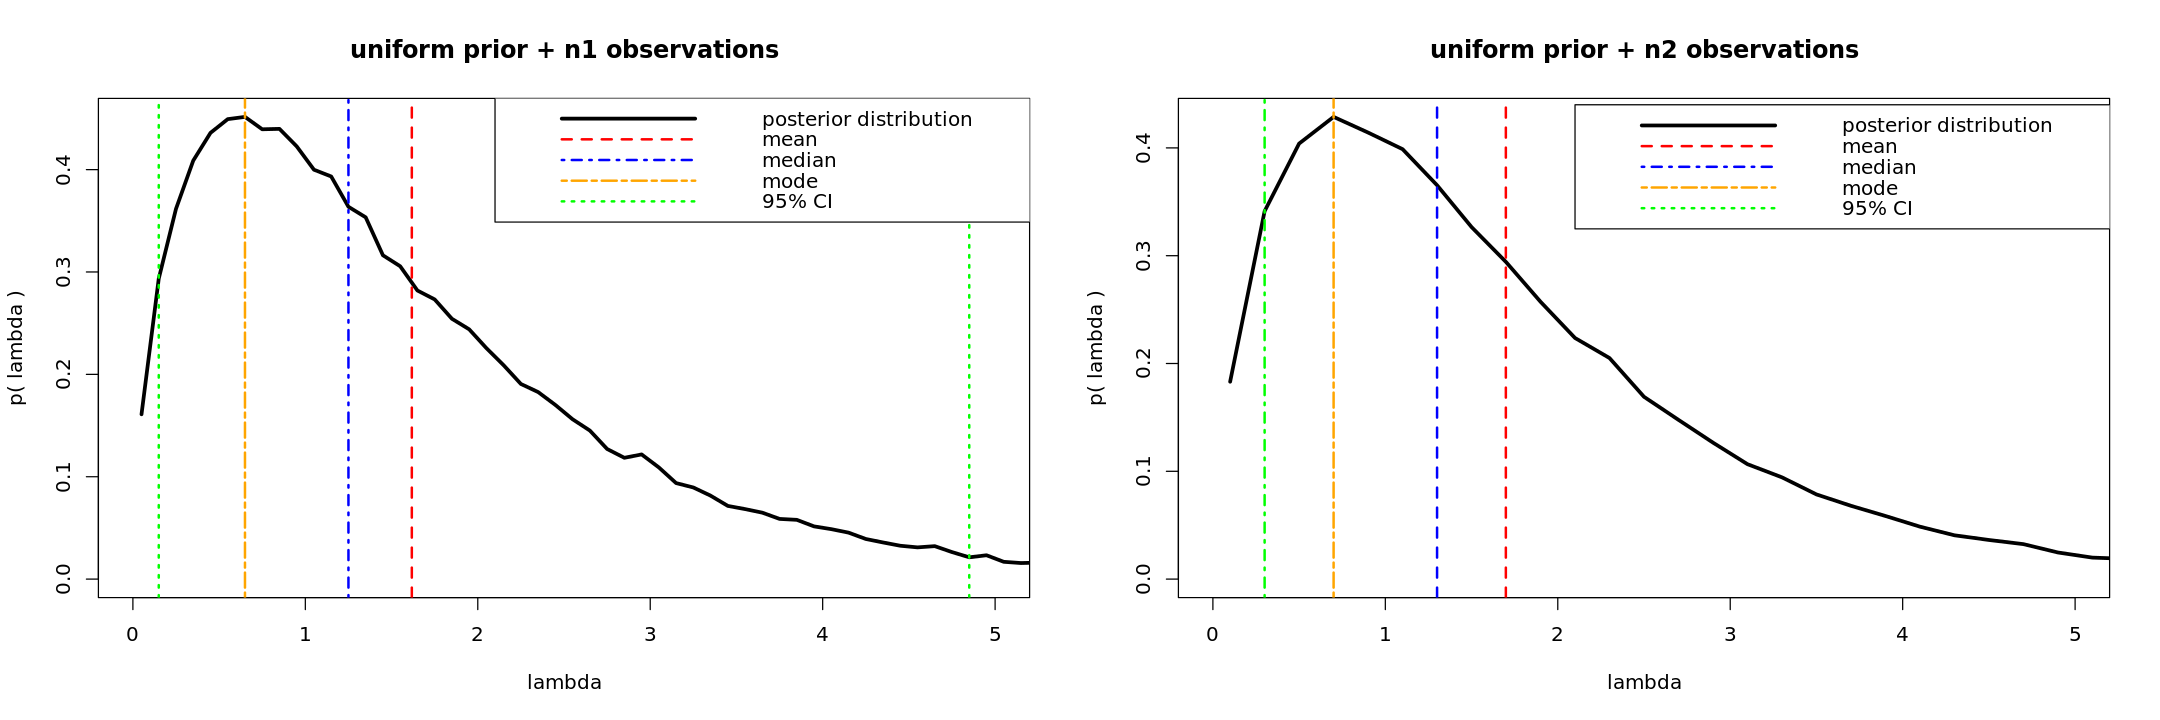

In [17]:
my_MCMC("uniform prior")

- assuming now a Jeffreys’ prior, $$ g(\lambda) ∝ 1/\sqrt{\lambda} \;\; \text{with} \;\; λ > 0 $$ compute and plot the posterior distribution for λ, the death rate over the measurement time. Determine the posterior mean, median and variance, and compute the 95% credibility interval.


,estimator,n1_observations,n2_observations
,<chr>,<dbl>,<dbl>
1,mean,0.617655,0.702326
2,variance,162.705375,135.347036
3,median,0.350000,0.450000
4,low_lim_CI,0.050000,0.050000
5,up_lim_CI,2.850000,3.050000
6,mode,0.050000,0.050000


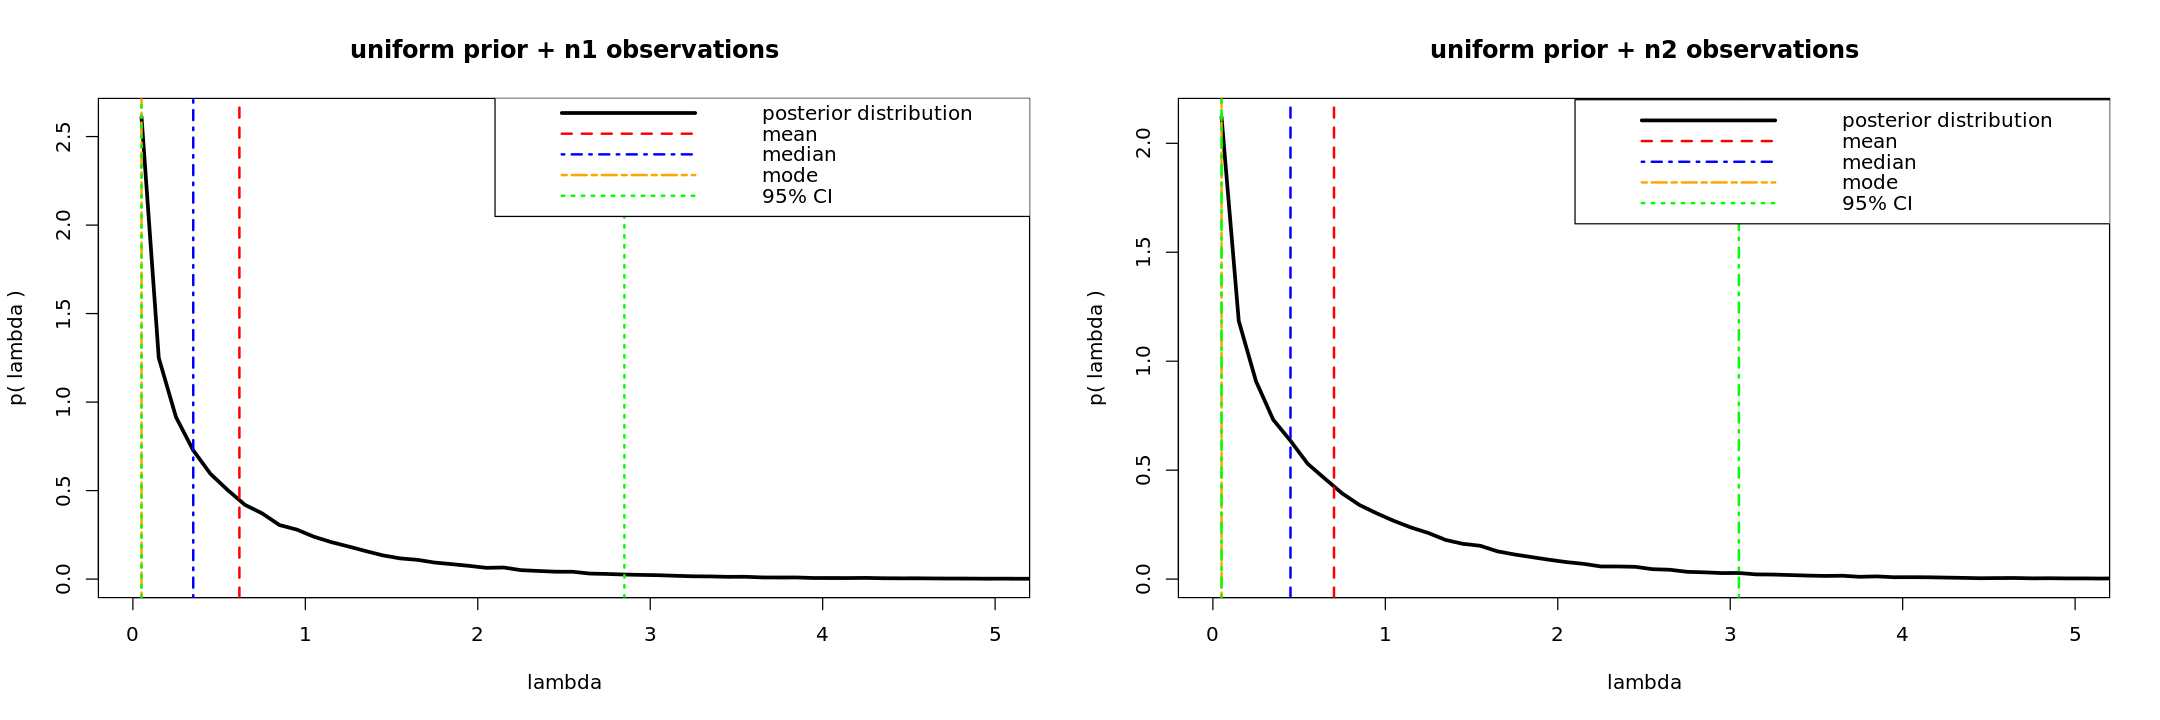

In [18]:
my_MCMC("Jeffreys' prior")

## Exercise 3
A study on water quality of streams, a high level of bacter X was defined as a level greater than 100 per 100 ml of stream water. n = 116 samples were taken from streams having a high environmental impact on pandas. Out of these, y = 11 had a high bacter X level. Indicating with p the probability that a sample of water taken from the stream has a high bacter X level:

In [19]:
# I initialize
# - the number of samples
n_tot <- 116
# - the number of samples having a high bacter X level
n_pos <- 11
# - the possible range of values for the probability
n_sample = 300
delta_p <- 1/n_sample
p <- seq(from=1/(2*n_sample), by=delta_p , length.out=n_sample)

a) find the frequentist estimator for p

In [20]:
# the frequentist estimator for the probability is
p_freq <- n_pos/n_tot
p_freq
p_freq_sigma <- p_freq*(1-p_freq)/n_tot
p_freq_sigma

[1] 0.09482759

[1] 0.0007399596

b) using a Beta(1, 10) prior for p, calculate and posterior distribution $P(p|y)$

In [21]:
# since the process is binomial, I can exploit the known properties of Beta distributions
# given a Beta(alpha,beta) prior, the posterior distribution is a Beta(alpha+n_pos, beta+n_tot-n_pos)
alpha_prior <- 1
beta_prior <- 10
prior_dist <- my_norm(dbeta(p, alpha_prior, beta_prior), delta_p)
alpha_post_0 <- alpha_prior + n_pos
beta_post_0 <- beta_prior + n_tot - n_pos
post_dist_0 <- my_norm(dbeta(p, alpha_post_0, beta_post_0), delta_p)

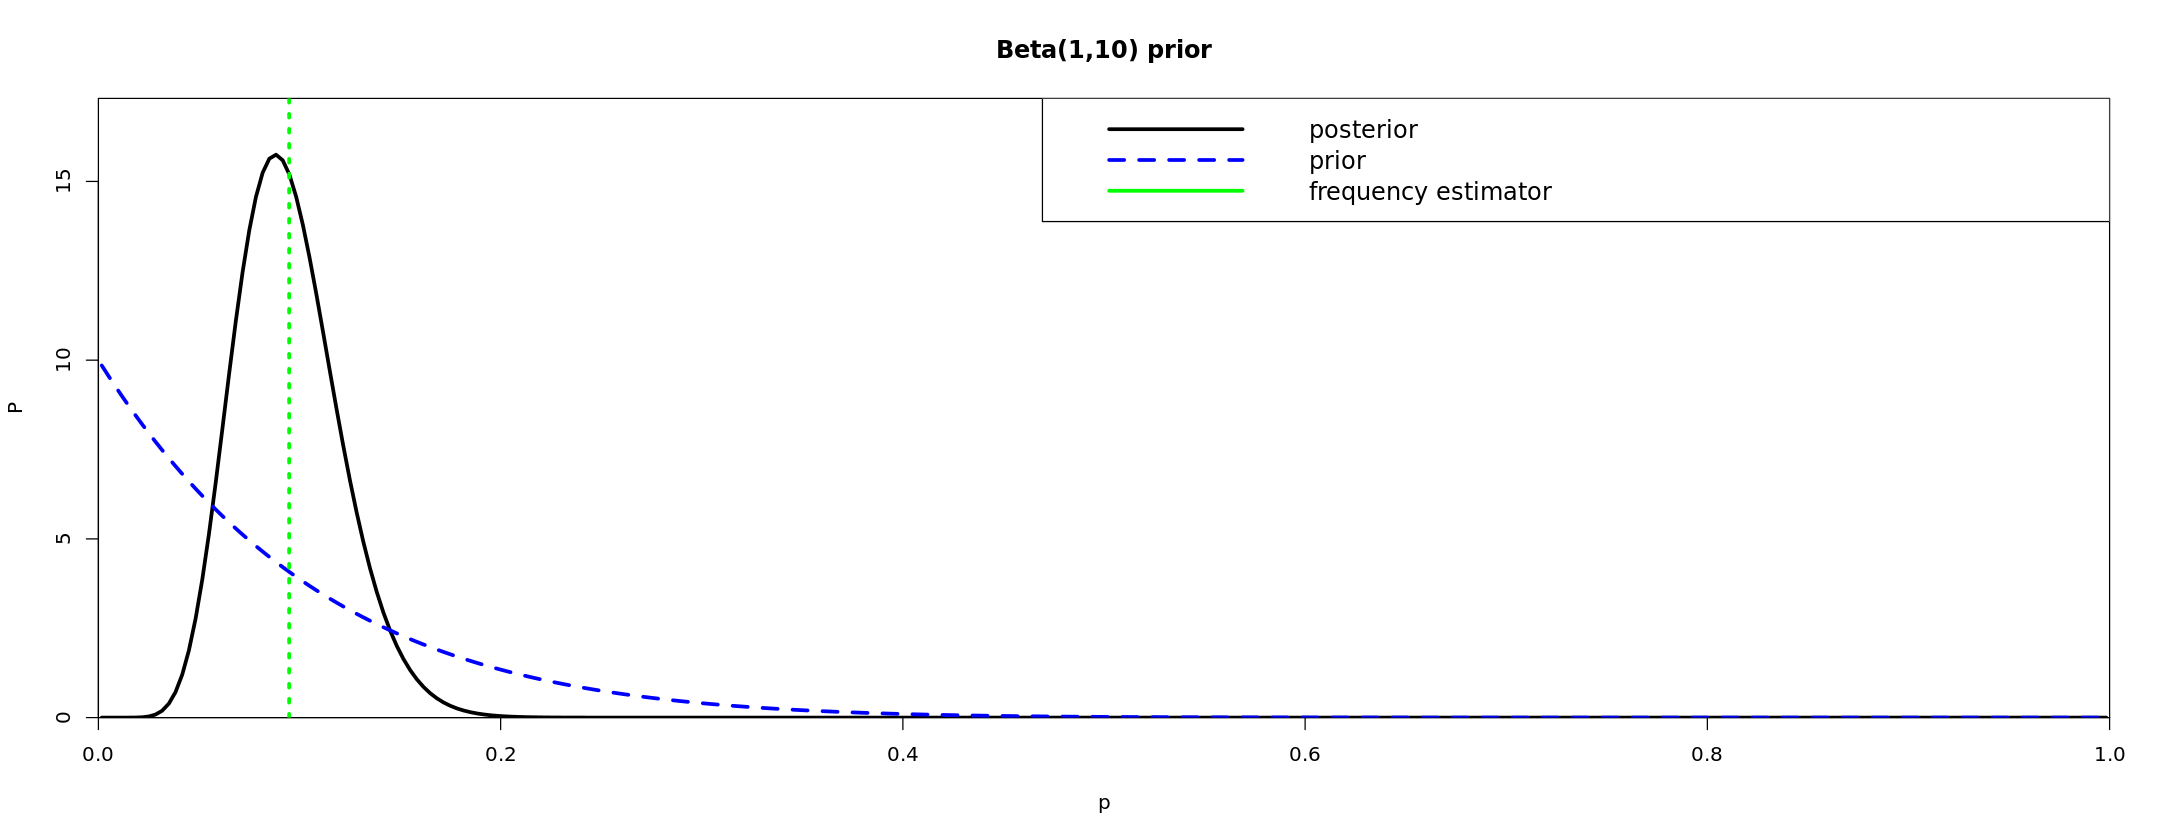

In [22]:
options(repr.plot.width=18, repr.plot.height=7)
plot(p, post_dist_0, type="l", lwd=3, col="black", xlim=c(0,1), ylim=c(0,1.1*max(post_dist_0)), xaxs="i", yaxs="i", xlab="p",
     ylab="P", main = "Beta(1,10) prior")
lines(p, prior_dist, type="l", lwd=3, col="blue", lty=2)
abline(v=p_freq, col='green', lwd=3, lty=3) 
legend("topright", legend=c("posterior", "prior", "frequency estimator"),
       col=c("black", "blue", "green"), lty = c(1, 2, 1), lwd=c(3, 3, 3), cex=1.2)

c) find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval

In [23]:
p_bayes <- p[which(post_dist_0 == max(post_dist_0))]
p_bayes_sigma <- delta_p
post_mean_0 <- my_mean(p, post_dist_0)
post_var_0 <- (my_std(p, post_dist_0))**2
post_lim_0 <- my_credibility_interval(post_dist_0, p, delta_p)

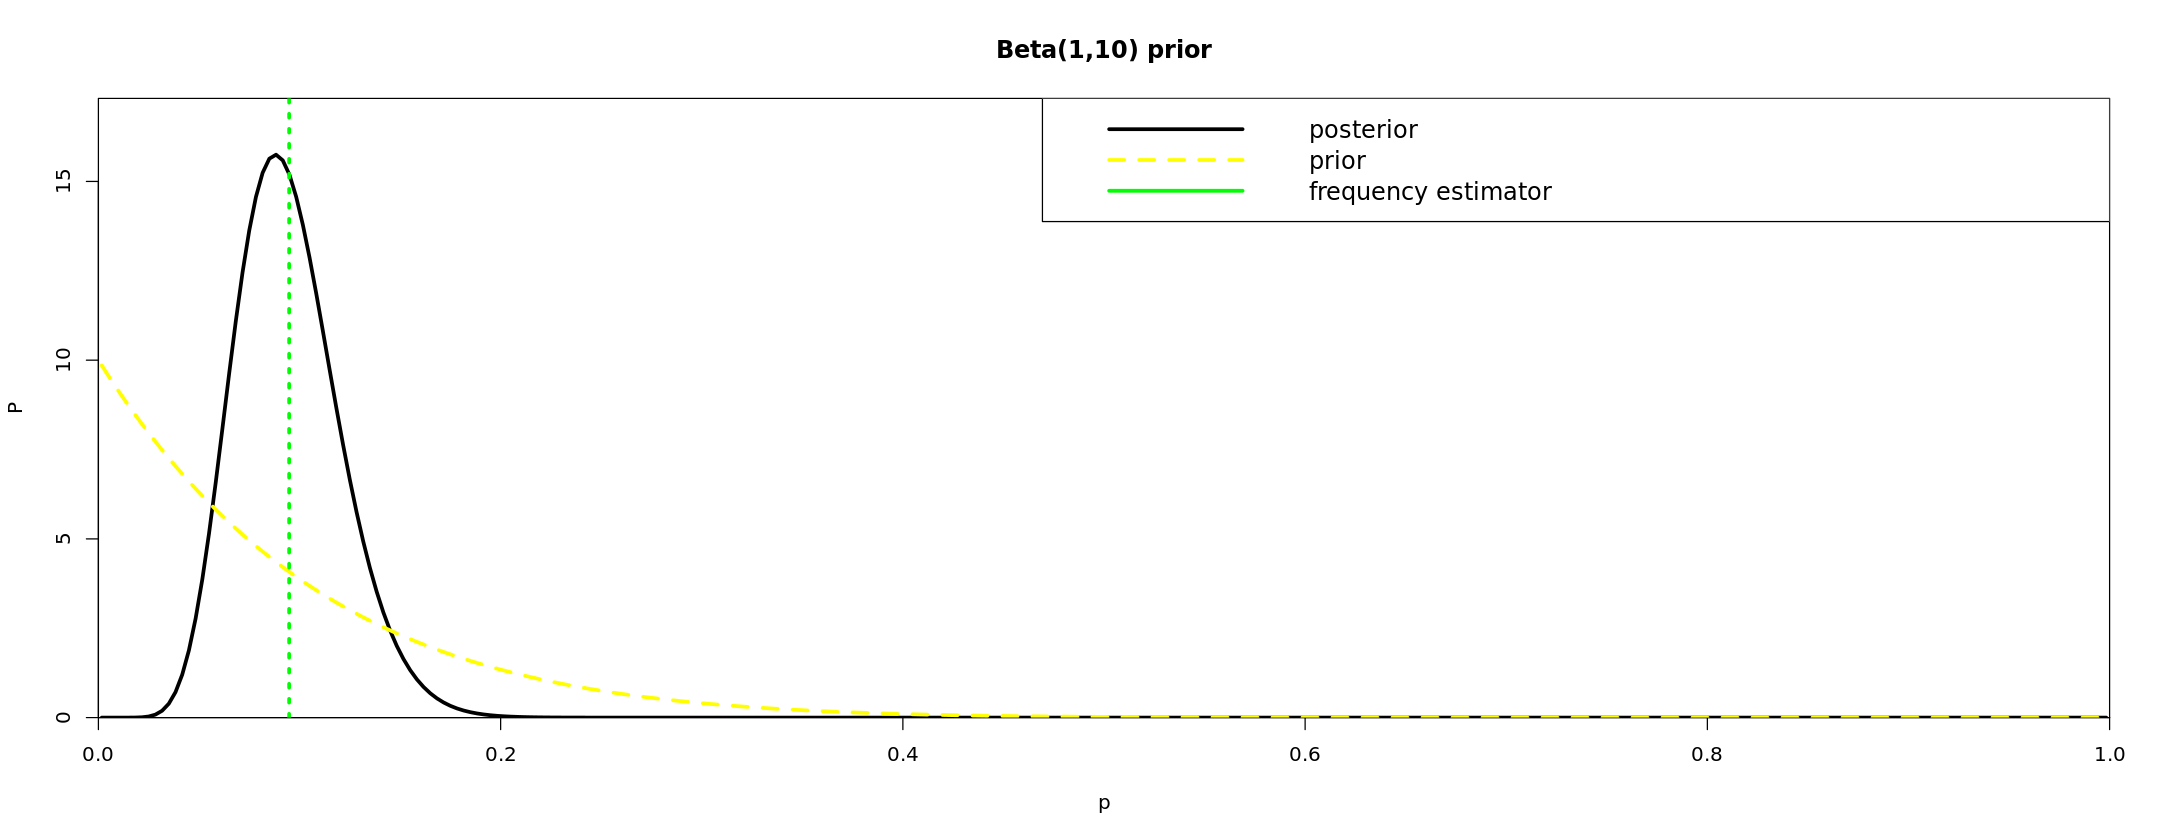

In [24]:
options(repr.plot.width=18, repr.plot.height=7)
plot(p, post_dist_0, type="l", lwd=3, col="black", xlim=c(0,1), ylim=c(0,1.1*max(post_dist_0)), xaxs="i", yaxs="i", xlab="p",
     ylab="P", main = "Beta(1,10) prior")
lines(p, prior_dist, type="l", lwd=3, col="yellow", lty=2)
abline(v=p_freq, col='green', lwd=3, lty=3) 
legend("topright", legend=c("posterior", "prior", "frequency estimator"),
       col=c("black", "yellow", "green"), lty = c(1, 2, 1), lwd=c(3, 3, 3), cex=1.2)

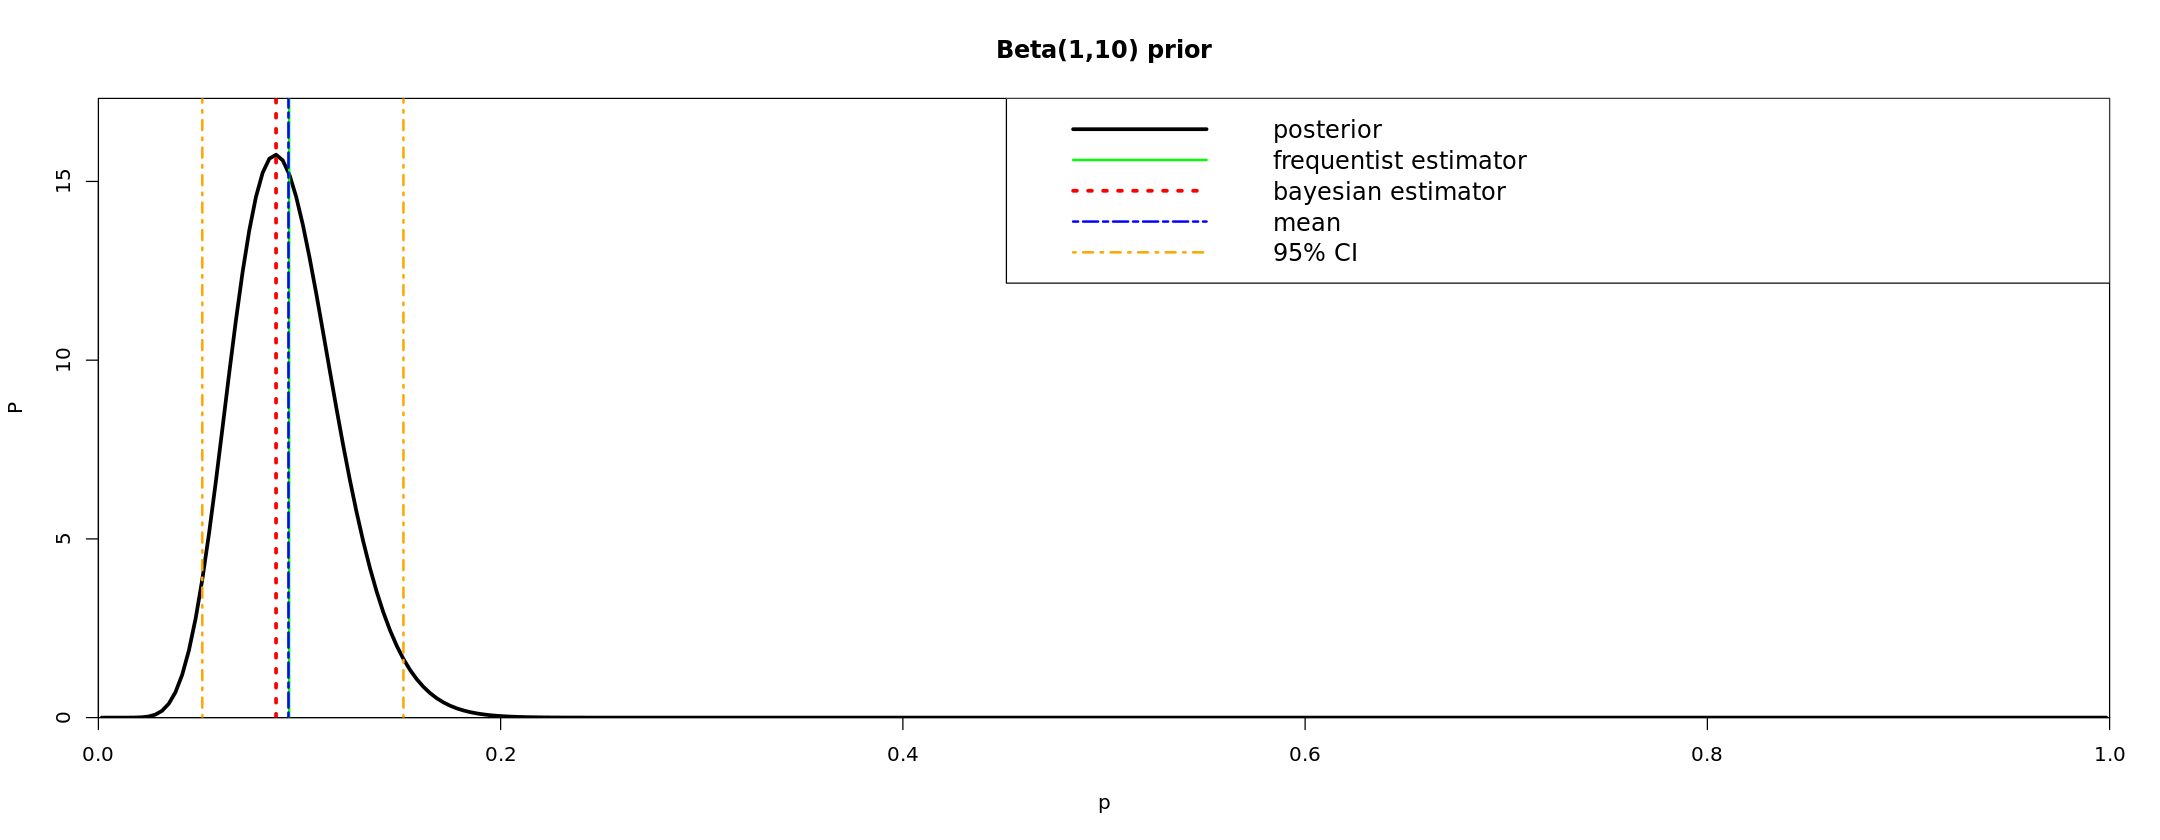

In [25]:
options(repr.plot.width=18, repr.plot.height=7)
plot(p, post_dist_0, type="l", lwd=3, col="black", xlim=c(0,1), ylim=c(0,1.1*max(post_dist_0)), xaxs="i", yaxs="i", xlab="p",
     ylab="P", main = "Beta(1,10) prior")
abline(v=p_freq, col='green', lwd=2, lty=1)
abline(v=p_bayes, col='red', lwd=3, lty=3)
abline(v=post_mean_0, col='blue', lwd=2, lty=6)
abline(v=post_lim_0[1], col='orange', lwd=2, lty=4)
abline(v=post_lim_0[2], col='orange', lwd=2, lty=4)
legend("topright", legend=c("posterior", "frequentist estimator", 'bayesian estimator', 'mean', "95% CI"),
       col=c("black", "green", 'red', 'blue', 'orange'), lty = c(1, 1, 3, 6, 4),lwd=c(3, 2, 3, 2, 2), cex=1.2)

d) test the hypotesis $$ H_0 : p = 0.1 \;\; \text{versus} \;\; H_1 : p \neq 0.1 $$ at 5% level of significance with both the frequentist and bayesian approach

In [26]:
alpha = 0.05
test_p = 0.1

In [27]:
# for the frequentist approach
n_sigma <- abs(test_p - p_freq)/p_freq_sigma

cat('frequentist approach: \n')
cat('since the result of the test hypothesis',round(n_sigma,0),'is much greater than the number of standard deviations (2)
corresponding to the significance level',alpha,', I can reject the null hypothesis at',alpha*100,"% significance level and
state that p ≠ 0.1.")

frequentist approach: 
since the result of the test hypothesis 7 is much greater than the number of standard deviations (2)
corresponding to the significance level 0.05 , I can reject the null hypothesis at 5 % significance level and
state that p ≠ 0.1.

In [28]:
# for the bayesian approach
n_sigma_bayes <- abs(test_p - p_bayes)/p_bayes_sigma
cat('bayesian approach: \n')
cat('since the result of the test hypothesis',round(n_sigma_bayes,0),'is much greater than the number of standard deviations 
(2) corresponding to the significance level',alpha,', I can reject the null hypothesis at',alpha*100,"% significance level and
state that p ≠ 0.1.")

bayesian approach: 
since the result of the test hypothesis 4 is much greater than the number of standard deviations 
(2) corresponding to the significance level 0.05 , I can reject the null hypothesis at 5 % significance level and
state that p ≠ 0.1.

A new measurement, performed one month later on n = 165 water samples, gives y = 9 high bacter X level

In [29]:
n_pos_new <- 9
n_tot_new <- 165

e)  find the frequentist estimator for p

In [30]:
p_freq_new <- n_pos_new/n_tot_new
p_freq_new
p_freq_sigma_new <- p_freq_new*(1-p_freq_new)/n_tot_new
p_freq_sigma_new

[1] 0.05454545

[1] 0.000312547

f) find a bayesian estimator for p, assuming both a Beta(1, 10) prior for p, and assuming the posterior probability of the older measurement as the prior for the new one.

In [31]:
# the bayesian estimator for p is the most likely value of p based on the posterior distribution 
# I find the posterior distribution by assuming an uniform prior (i.e. Beta(1,1))
prior_dist <- my_norm(dbeta(p, alpha_post_0, beta_post_0), delta_p)
alpha_post <- alpha_post_0 + n_pos_new
beta_post <- beta_post_0 + n_tot_new - n_pos_new
post_dist <- my_norm(dbeta(p, alpha_post, beta_post), delta_p)
p_bayes <- p[which(post_dist == max(post_dist))]
post_mean <- my_mean(p, post_dist)
post_var <- (my_std(p, post_dist))**2
post_lim <- my_credibility_interval(post_dist, p, delta_p)
p_bayes_new <- p[which(post_dist == max(post_dist))]
p_bayes_sigma_new <- delta_p

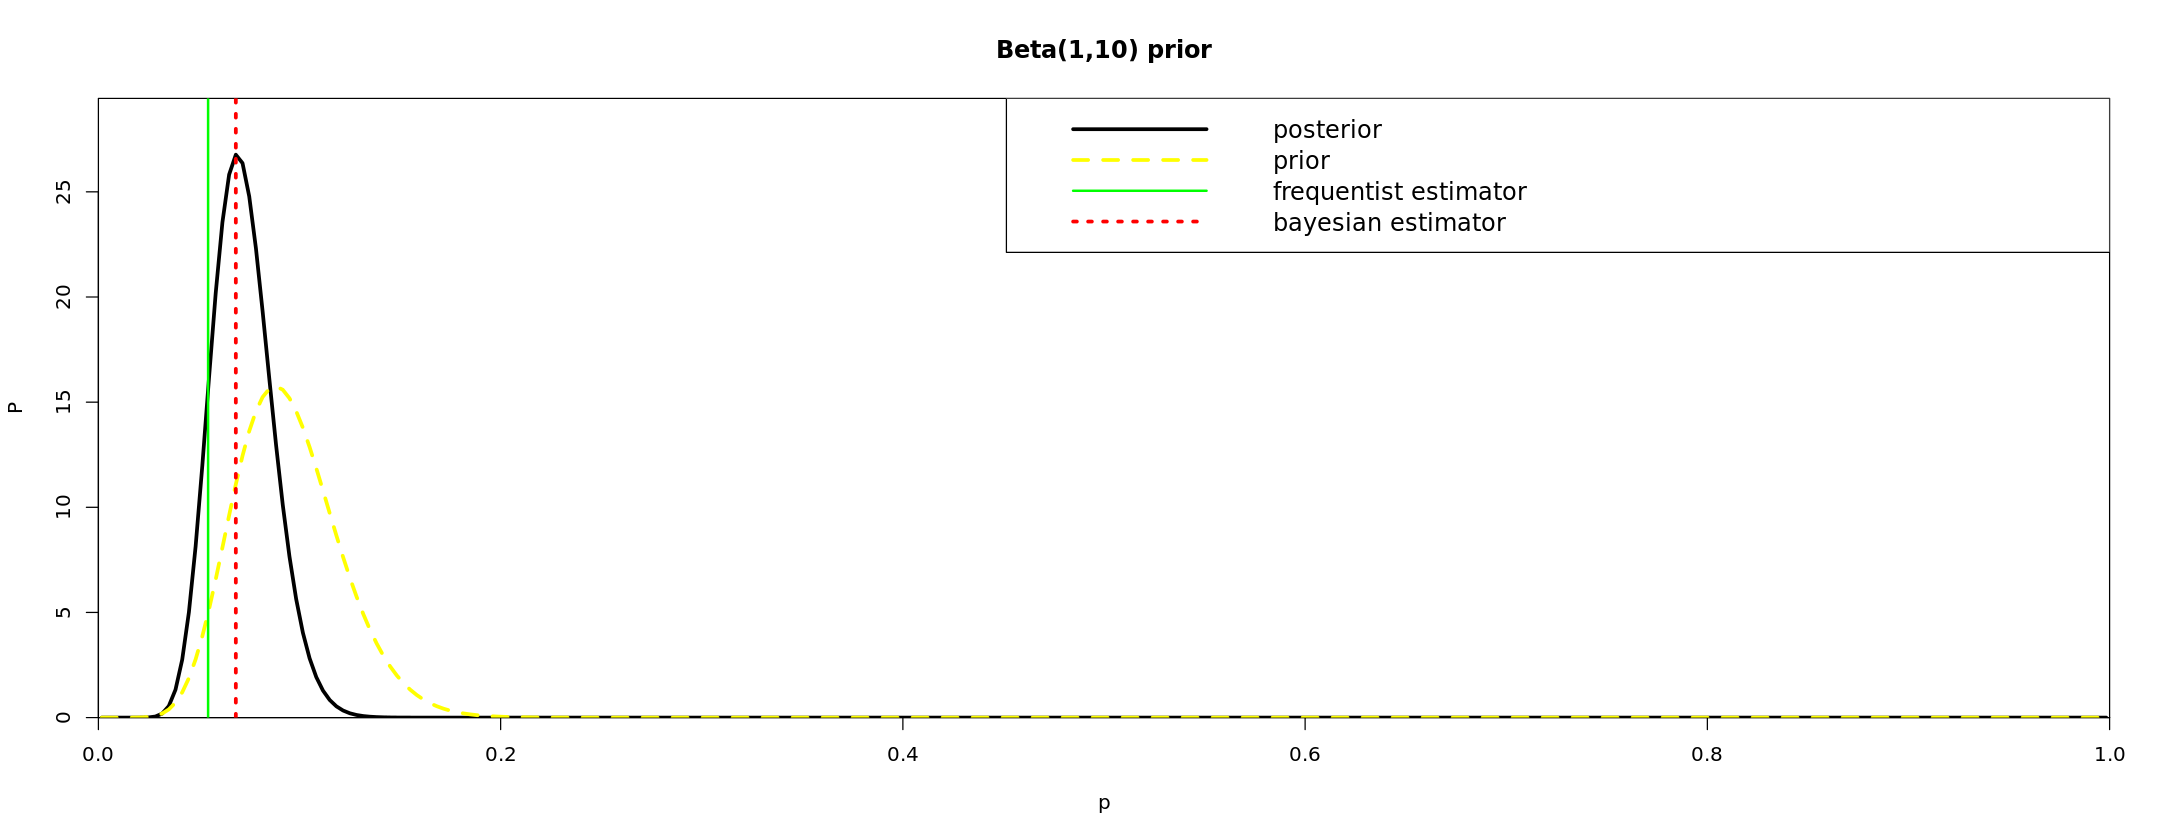

In [32]:
options(repr.plot.width=18, repr.plot.height=7)
plot(p, post_dist, type="l", lwd=3, col="black", xlim=c(0,1), ylim=c(0,1.1*max(post_dist)), xaxs="i", yaxs="i", xlab="p",
     ylab="P", main = "Beta(1,10) prior")
lines(p, post_dist_0, type="l", lwd=3, col="yellow", lty=2)
abline(v=p_freq_new, col='green', lwd=2, lty=1)
abline(v=p_bayes_new, col='red', lwd=3, lty=3)
legend("topright", legend=c("posterior", "prior", "frequentist estimator", 'bayesian estimator'),
       col=c("black", "yellow", "green", 'red'), lty = c(1, 2, 1, 3),lwd=c(3, 3, 2, 3), cex=1.2)

g) find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval

In [33]:
# I use the known formulas
post_mean <- my_mean(p, post_dist)
post_var <- (my_std(p, post_dist))**2
post_lim <- my_credibility_interval(post_dist, p, delta_p)

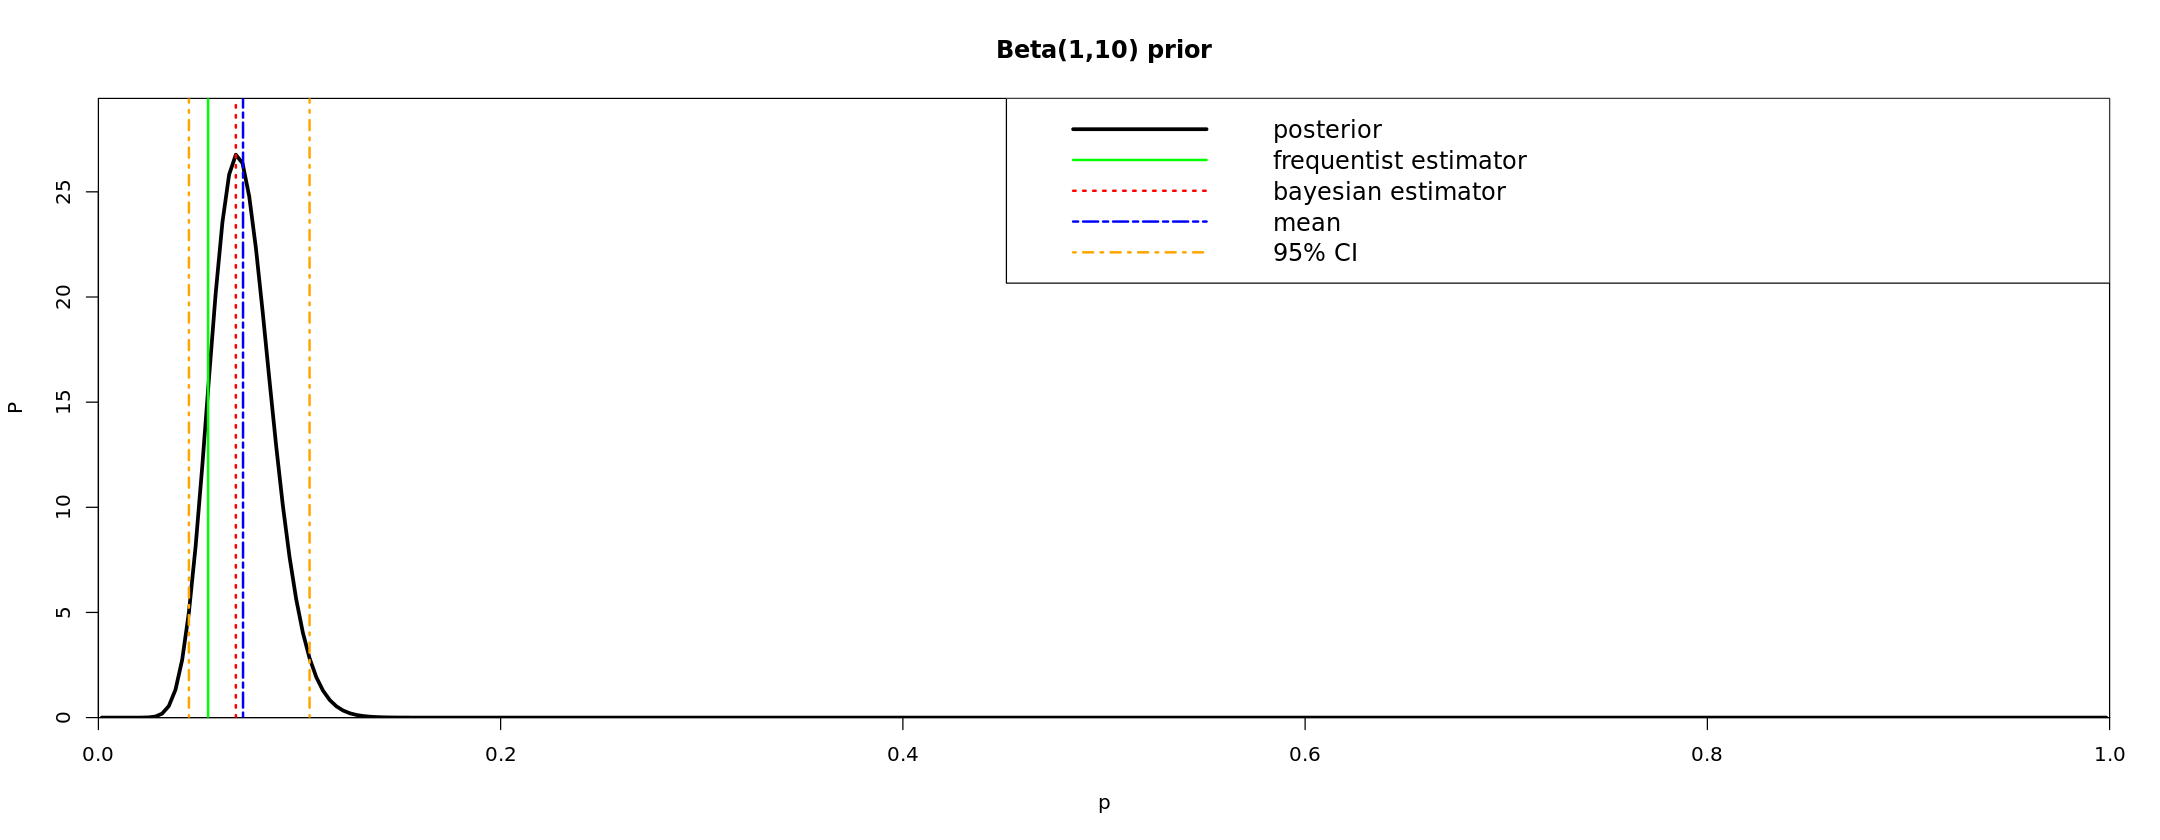

In [34]:
options(repr.plot.width=18, repr.plot.height=7)
plot(p, post_dist, type="l", lwd=3, col="black", xlim=c(0,1), ylim=c(0,1.1*max(post_dist)), xaxs="i", yaxs="i", xlab="p",
     ylab="P", main = "Beta(1,10) prior")
abline(v=p_freq_new, col='green', lwd=2, lty=1)
abline(v=p_bayes_new, col='red', lwd=2, lty=3)
abline(v=post_mean, col='blue', lwd=2, lty=6)
abline(v=post_lim[1], col='orange', lwd=2, lty=4)
abline(v=post_lim[2], col='orange', lwd=2, lty=4)
legend("topright", legend=c("posterior", "frequentist estimator", 'bayesian estimator', 'mean', "95% CI"),
       col=c("black", "green", 'red', 'blue', 'orange'), lty = c(1, 1, 3, 6, 4),lwd=c(3, 2, 2, 2, 2), cex=1.2)

h) test the hypotesis $$ H_0 : p = 0.1 \;\; \text{versus} \;\; H_1 : p \neq 0.1 $$ at 5% level of significance with both the frequentist and bayesian approach

In [35]:
# I use a one side hypothesis test and set as null hypothesis that p < 0.1

In [36]:
alpha = 0.05
test_p = 0.1

In [37]:
# for the frequentist approach
n_sigma_freq <- abs(test_p - p_freq_new)/p_freq_sigma_new

cat('frequentist approach: \n')
cat('since the result of the test hypothesis',round(n_sigma_freq,0),'is much greater than the number of standard deviations (2)
corresponding to the significance level',alpha,', I can reject the null hypothesis at',alpha*100,"% significance level and
state that p ≠ 0.1.")

frequentist approach: 
since the result of the test hypothesis 145 is much greater than the number of standard deviations (2)
corresponding to the significance level 0.05 , I can reject the null hypothesis at 5 % significance level and
state that p ≠ 0.1.

In [38]:
# for the bayesian approach
n_sigma_bayes <- abs(test_p - p_bayes_new)/p_bayes_sigma_new
cat('bayesian approach: \n')
cat('since the result of the test hypothesis',round(n_sigma_bayes,0),'is much greater than the number of standard deviations 
(2) corresponding to the significance level',alpha,', I can reject the null hypothesis at',alpha*100,"% significance level and
state that p ≠ 0.1.")

bayesian approach: 
since the result of the test hypothesis 10 is much greater than the number of standard deviations 
(2) corresponding to the significance level 0.05 , I can reject the null hypothesis at 5 % significance level and
state that p ≠ 0.1.

## Exercise 4
Analyze the data of Exercise 3 and solve points (b) and (c) using a MCMC with JAGS

b) using a Beta(1, 10) prior for p, calculate and posterior distribution  𝑃(𝑝|𝑦)

c) find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval

,estimator,data
,<chr>,<dbl>
1,mean,0.1022224
2,variance,0.1713565
3,median,0.1010000
4,low_lim_CI,0.0550000
5,up_lim_CI,0.1630000
6,mode,0.0950000


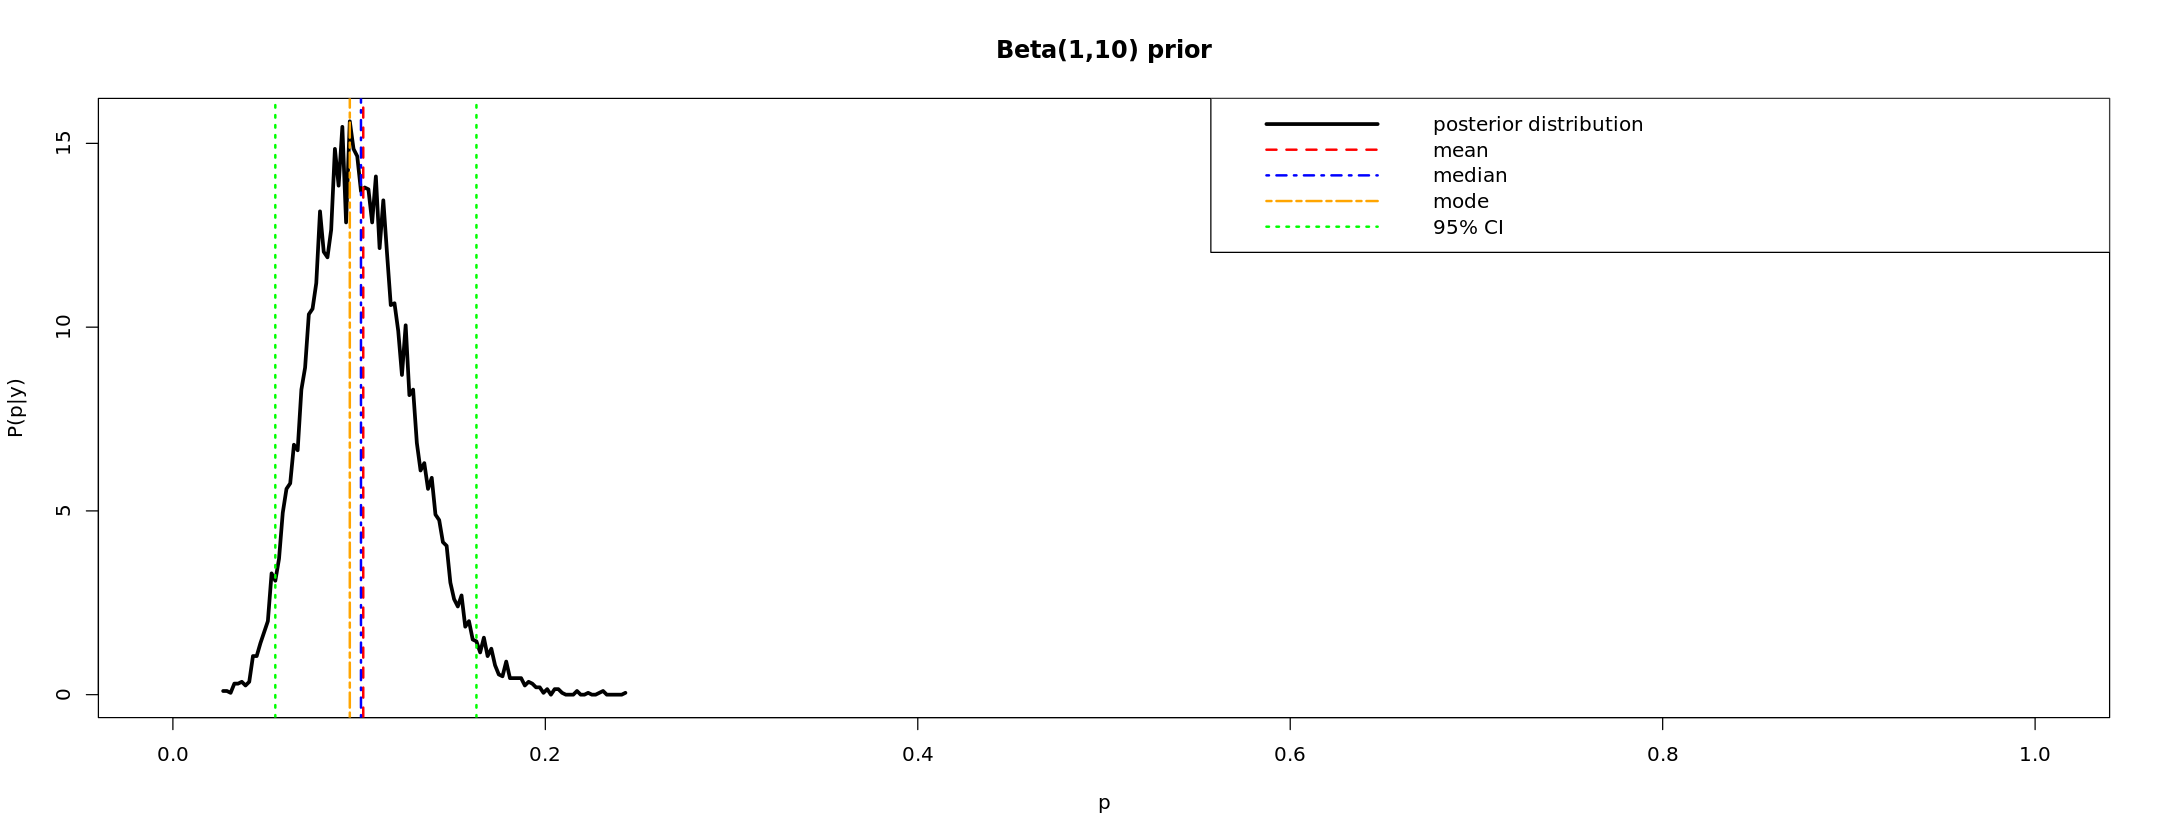

In [39]:
# I initialize the parameters that are related to the pieces of data given by the 
data_obs <- c(rep(1,times=n_pos), rep(0,times=n_tot - n_pos))

data <- NULL
data$X <- data_obs # Set of observations
#data$n <- length(data_obs) # those to be considered
data$n_next <- 10 # Prediction

# and the MCMC model itself
model = 'Brisigotti_Erica_rlab05_beta_prior_MCMC.bug'
jm <- jags.model(model , data, quiet=TRUE)             
# I update the Markov chain by setting the number of iterations
update(jm, 10000)
# I then sample from the MCMC algorithm
chain <- coda.samples(jm, variable.names = c("p",'y'), n.iter = 10000)
# and save my chain in a dataframe format
df <- as.data.frame( as.mcmc(chain) )

temp_1 <- hist(df$p, plot=FALSE, nc=100)
# I update the terminology to match the wording used in the previous sections of the code
post_dist_1 <- temp_1$density
y_1 <- temp_1$mids
delta_y_1 <- y_1[2]-y_1[1]

st <- data.frame( estimator=NA, data=NA )
mean_1 <- my_mean(y_1, post_dist_1)
st[1,] = c('mean', mean_1)
var_1 <- (my_std(y_1, post_dist_1))**2
st[2,] = c('variance', var_1)
med_1 <- my_median(post_dist_1, y_1, delta_y_1)
st[3,] = c('median', med_1)
lim_1 <- my_credibility_interval(post_dist_1, y_1, delta_y_1)
st[4,] = c('low_lim_CI', lim_1[1])
st[5,] = c('up_lim_CI', lim_1[2])
mode_1 <- my_mode(y_1, post_dist_1)
st[6,] = c('mode', mode_1)

# I can finally plot everything I want to show, all together
options( repr.plot.width=18, repr.plot.height=7)

plot(y_1, post_dist_1, col='black', type='l', lwd=3, lty=1, main="Beta(1,10) prior", xlab='p',
     ylab='P(p|y)', xlim=c(0,1))
abline(v=mean_1, col='red', lwd=2, lty=2)
abline(v=med_1, col='blue', lwd=2, lty=4)
abline(v=mode_1, col='orange', lwd=2, lty=6)
abline(v=lim_1, col='green', lwd=2, lty=3)
legend('topright', legend=c("posterior distribution","mean",'median','mode','95% CI'),
       col=c('black','red','blue','orange','green'), lty = c(1, 2, 4, 6, 3), lwd=c(3, 2, 2, 2, 2))

st %>% mutate( data=as.numeric(data)) -> st
st